# Conversion Rate 

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn import preprocessing

###### Let's see what we got in this data 

the given table below depits first 5 samples from out dataset

In [2]:
df = pd.read_csv('/home/nikit/Desktop/conversion_rate/conversion_data.csv',sep=',')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
df.shape

(316200, 6)

In [4]:
df['country'].count()

316200

In [5]:
grouped_by_country_conversionRate = df.groupby('country')['converted'].mean()
print grouped_by_country_conversionRate


country
China      0.001332
Germany    0.062500
UK         0.052632
US         0.037801
Name: converted, dtype: float64


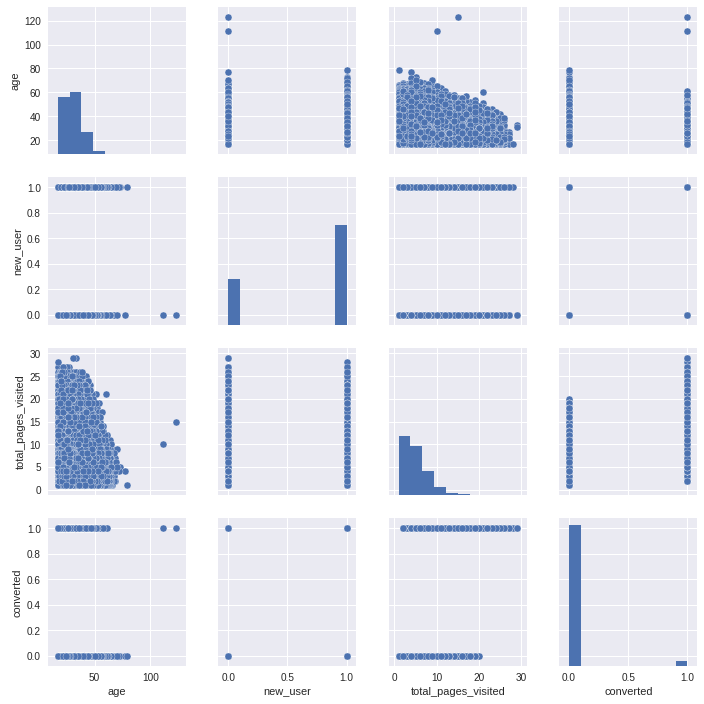

In [6]:
sns.pairplot(df)
sns.plt.show()

As we can see some outliers in age variable. They take the values as 100 & 120. Certainly, we can remove them.

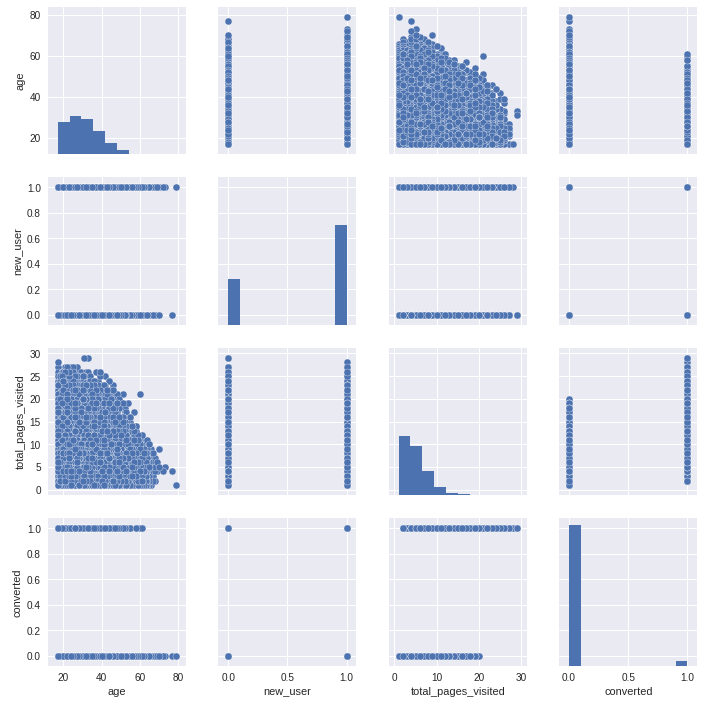

In [7]:
#Plot the graph again to check whether these outliers where removed or not
df = df.query('age<100')
sns.pairplot(df)
sns.plt.show()

In [8]:
df.shape

(316198, 6)

#### This is surely an US site and China has worst conversion rate.

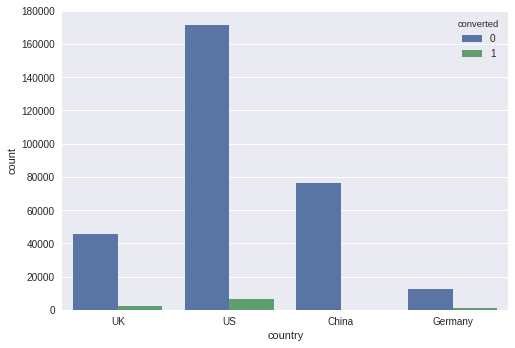

In [9]:
df['converted_categorical'] = df['converted'].astype('category')
sns.countplot(x='country',data=df,hue='converted')
sns.plt.show()

###### lovely!!! we can se that more time the users browse between pages higher the chances of getting them converted. This also indicates that total_pages_visited will be one of the important feature.

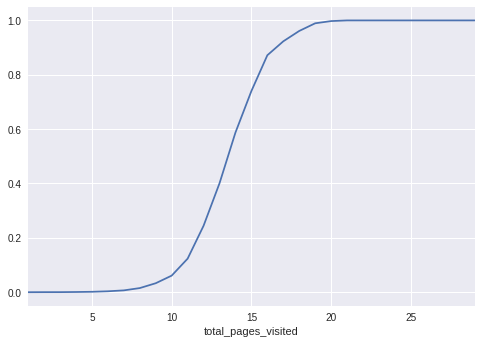

In [10]:
groupby_total_pages_visited = df.groupby(['total_pages_visited'])['converted'].mean()
groupby_total_pages_visited.plot.line()
plt.show()

In [11]:
df[df['country']=='China']['converted'].count()

k2 = df.loc[(df['country']=='China') & (df['converted']==0),['country']].count()
k2

country    76500
dtype: int64

In [72]:
df['source'] = pd.factorize(df['source'])[0]
df['country'] = pd.factorize(df['country'])[0]
df['converted'] = pd.factorize(df['converted'])[0]
#df = df.drop('converted_categorical',1)

In [73]:
train = df.sample(frac=0.8,random_state=100)
test = df.drop(train.index)

In [74]:
train.shape
train.head()

,country,age,new_user,source,total_pages_visited,converted
23915,1,46,1,1,4,0
60991,1,42,1,0,6,0
69351,2,31,1,1,7,0
241888,0,22,1,1,4,0
309811,1,29,0,1,7,0


In [75]:
test.shape

(63240, 6)

In [95]:
features = train.columns[:5]
clf = RandomForestClassifier(n_jobs=2)
y = train['converted']

clf.fit(train[features],y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [96]:
preds = clf.predict(test[features])
np.unique(preds)

array([0, 1])

In [97]:
pd.crosstab(test['converted'],preds,rownames=['actual'],colnames=['preds'])

preds,0,1
actual,,
0,60874,313
1,645,1408


In [98]:
imp = clf.feature_importances_

In [99]:
features

Index([u'country', u'age', u'new_user', u'source', u'total_pages_visited'], dtype='object')

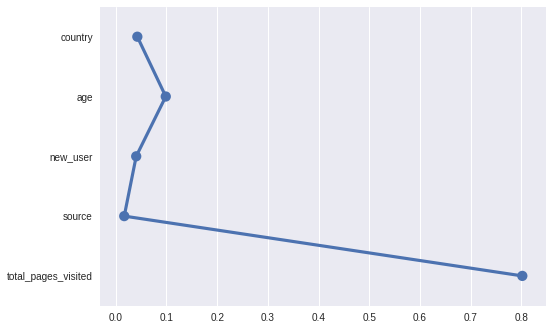

In [101]:
sns.pointplot(x=imp,y=features)
sns.plt.show()